<a href="https://colab.research.google.com/github/SamAniedi/facial_emotion_recogniton_CNN/blob/main/fer_2013_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
train_dir = "C:/Users/saman/OneDrive/Desktop/fer-2013/train"
test_dir = "C:/Users/saman/OneDrive/Desktop/fer-2013/test"

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.python.ops.gen_array_ops import reshape
# generating batches of tensor image data
print("\nTraining dataset\n")
for expression in os.listdir("C:/Users/saman/OneDrive/Desktop/fer-2013/train/"):
    print(str(len(os.listdir( "C:/Users/saman/OneDrive/Desktop/fer-2013/train/" + expression))) + " " + expression + " images")
print("\nTest dataset\n")
for expression in os.listdir("C:/Users/saman/OneDrive/Desktop/fer-2013/test/"):
    print(str(len(os.listdir("C:/Users/saman/OneDrive/Desktop/fer-2013/test/" + expression))) + " " + expression + " images")


Training dataset

3995 angry images
436 disgust images
4097 fear images
7215 happy images
4965 neutral images
4830 sad images
3171 surprise images

Test dataset

958 angry images
111 disgust images
1024 fear images
1774 happy images
1233 neutral images
1247 sad images
831 surprise images


In [ ]:
from tensorflow.python.ops.gen_array_ops import reshape


train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (48,48),
    batch_size = 32,
    class_mode='categorical',
    color_mode = "grayscale"

)

validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(48,48),
    batch_size = 32,
    class_mode='categorical',
    color_mode = "grayscale"
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential

model = Sequential()

model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
# to compile the model
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

epochs = 20
steps_per_epoch = train_generator.n//train_generator.batch_size

validation_steps = validation_generator.n//validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto', verbose=1)

checkpoint = ModelCheckpoint("fer_2013_cnn_model.h5", monitor='val_acc',
                             save_weights_only=True, mode='max', verbose=1) # save_best_only = True

# earlystop = EarlyStopping(monitor='val_loss', patience = 4, verbose=1, mode='auto')

callbacks = [reduce_lr, checkpoint] # earlystiop

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)


Epoch 1/20
896/897 [============================>.] - ETA: 0s - loss: 1.7707 - acc: 0.3174
Epoch 00001: saving model to fer_2013_cnn_model.h5
897/897 [==============================] - 883s 985ms/step - loss: 1.7707 - acc: 0.3173 - val_loss: 1.4856 - val_acc: 0.4404
Epoch 2/20
896/897 [============================>.] - ETA: 0s - loss: 1.4347 - acc: 0.4475
Epoch 00002: saving model to fer_2013_cnn_model.h5
897/897 [==============================] - 966s 1s/step - loss: 1.4350 - acc: 0.4474 - val_loss: 1.2742 - val_acc: 0.5053
Epoch 3/20
896/897 [============================>.] - ETA: 0s - loss: 1.2978 - acc: 0.5063
Epoch 00003: saving model to fer_2013_cnn_model.h5
897/897 [==============================] - 773s 862ms/step - loss: 1.2977 - acc: 0.5063 - val_loss: 1.2469 - val_acc: 0.5121
Epoch 4/20
896/897 [============================>.] - ETA: 0s - loss: 1.2272 - acc: 0.5340
Epoch 00004: saving model to fer_2013_cnn_model.h5
897/897 [==============================] - 768s 856ms/step -

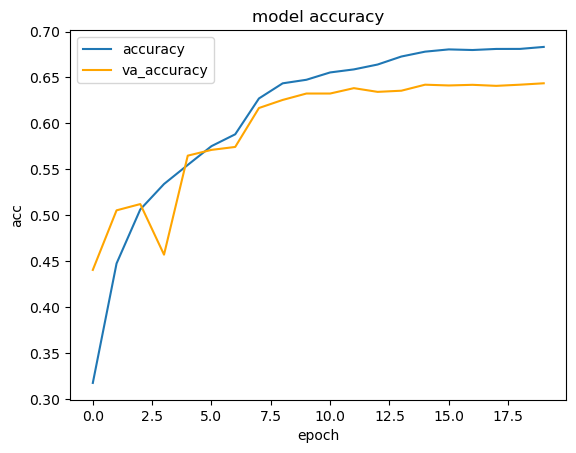

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'], color = "orange")
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['accuracy', 'va_accuracy'], loc='upper left')
plt.show()

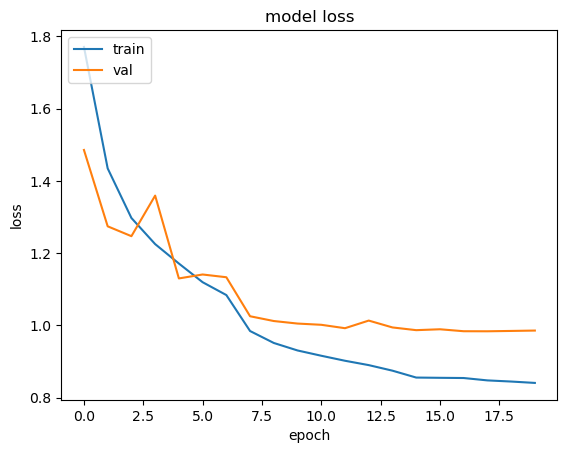

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from keras import backend
backend.clear_session()

# Data Augmentation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.python.ops.gen_array_ops import reshape


# Preprocessing
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest',
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (48,48),
    color_mode ="grayscale",
    batch_size = 32,
    class_mode='categorical',
    shuffle = True
)



validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size = (48,48),
    color_mode = "grayscale",
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [ ]:
# model compilation
opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

epochs = 100

steps_per_epoch = train_generator.n//train_generator.batch_size

validation_steps = validation_generator.n//validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience = 5, min_lr=0.00001, mode='auto')

checkpoint = ModelCheckpoint("final_fer2013_cnn_model.h5", monitor='val_acc',
                             save_weights_only=True, mode='max', verbose=1) #save_best_only = True

# earlystop = EarlyStopping(monitor='val_loss', patience = 5, verbose = 1, mode='auto')

callbacks = [checkpoint, reduce_lr] # earlystop

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

Epoch 1/100
896/897 [============================>.] - ETA: 0s - loss: 1.8979 - acc: 0.2542
Epoch 00001: saving model to final_fer2013_cnn_model.h5
897/897 [==============================] - 868s 967ms/step - loss: 1.8975 - acc: 0.2544 - val_loss: 1.7618 - val_acc: 0.2965
Epoch 2/100
896/897 [============================>.] - ETA: 0s - loss: 1.6445 - acc: 0.3606
Epoch 00002: saving model to final_fer2013_cnn_model.h5
897/897 [==============================] - 699s 780ms/step - loss: 1.6443 - acc: 0.3607 - val_loss: 1.4948 - val_acc: 0.4304
Epoch 3/100
896/897 [============================>.] - ETA: 0s - loss: 1.4829 - acc: 0.4296
Epoch 00003: saving model to final_fer2013_cnn_model.h5
897/897 [==============================] - 693s 773ms/step - loss: 1.4827 - acc: 0.4296 - val_loss: 1.3657 - val_acc: 0.4662
Epoch 4/100
896/897 [============================>.] - ETA: 0s - loss: 1.3756 - acc: 0.4698
Epoch 00004: saving model to final_fer2013_cnn_model.h5
897/897 [========================

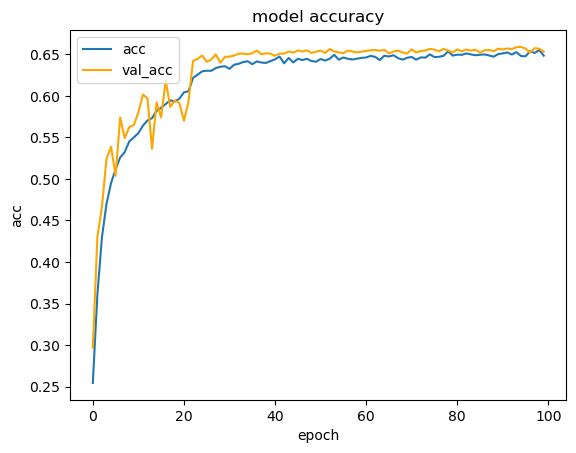

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'], color = "orange")
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

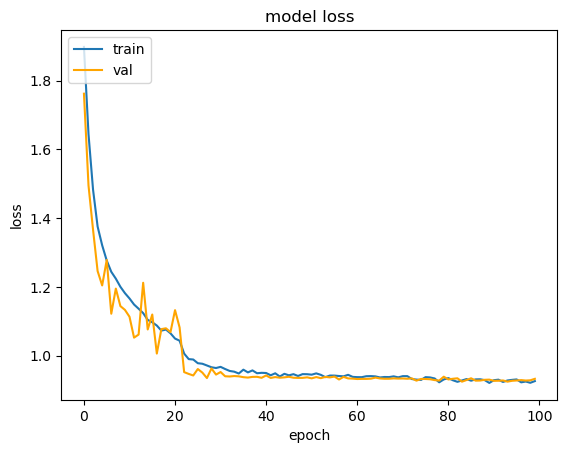

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], color = "orange")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)